In [41]:
import torch
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.animation as ani

print(torch.__version__)

1.13.1


In [25]:
data1 = np.load('C:/Users/Playdata/2D-Motion-Retargeting/outputs/full-demo/results.npz')
for i in data1:
    print(i)

input1
input2
input3
out


In [26]:
data1['out'].shape

(15, 2, 120)

In [58]:
data2 = np.load('C:/Users/Playdata/2D-Motion-Retargeting/outputs/skeleton-demo/results.npz')
for i in data2:
    print(i)

input1
input2
out12
out21


In [21]:
data3 = np.load('C:/Users/Playdata/2D-Motion-Retargeting/outputs/view-demo/results.npz')
for i in data3:
    print(i)

input1
input2
out12
out21


In [24]:
data3['out12'].shape

(15, 2, 120)

In [30]:
sample = data1['out'][:, :, 0]

In [34]:
df1 = pd.DataFrame(sample)
df1

,0,1
0,250.346148,150.895907
1,254.440146,184.156412
2,230.526833,185.143246
3,225.582890,216.638337
4,219.843705,249.390726
5,278.321042,183.105438
6,287.335458,208.572130
7,282.636776,229.376030
8,256.169775,256.070462
9,243.874524,256.505959


In [40]:
df1.to_csv('./2dMotion/df1.csv')

In [45]:
points = {}
points['x'] = df1[0]
points['y'] = df1[1]

In [47]:
df_points = pd.DataFrame(points)

In [48]:
df_points

,x,y
0,250.346148,150.895907
1,254.440146,184.156412
2,230.526833,185.143246
3,225.582890,216.638337
4,219.843705,249.390726
5,278.321042,183.105438
6,287.335458,208.572130
7,282.636776,229.376030
8,256.169775,256.070462
9,243.874524,256.505959


In [55]:
df_points['x'][0], df_points['y'][0]

(250.3461479423898, 150.89590652798358)

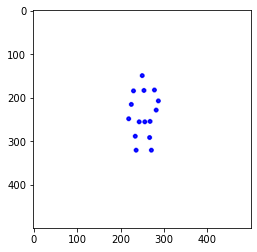

In [57]:
img = np.zeros(shape=(500, 500, 3), dtype=np.uint8) + 255

for i in range(len(df1)):
    cx = int(df1[0][i])
    cy = int(df1[1][i])
    cv2.circle(img, (cx, cy), radius=3, color=(0, 0, 255), thickness=4)  
vxcv(crcolthick)

In [62]:
sample = data2['out12'][:, :, 0]
df2 = pd.DataFrame(sample)
df2

,0,1
0,245.956771,147.654335
1,249.258298,180.331331
2,222.747692,183.125885
3,218.259132,218.321854
4,218.443691,246.683835
5,275.779200,177.528268
6,292.243514,206.349315
7,295.025748,228.330887
8,256.058041,256.047144
9,240.906964,256.929478


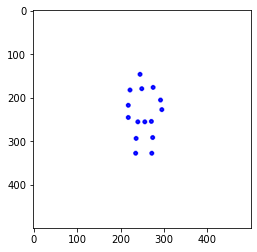

In [63]:
img = np.zeros(shape=(500, 500, 3), dtype=np.uint8) + 255

for i in range(len(df2)):
    cx = int(df2[0][i])
    cy = int(df2[1][i])
    cv2.circle(img, (cx, cy), radius=3, color=(0, 0, 255), thickness=4)  
plt.imshow(img)

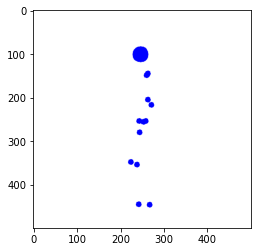

In [67]:
sample = data3['out12'][:, :, 0]
df3 = pd.DataFrame(sample)

img = np.zeros(shape=(500, 500, 3), dtype=np.uint8) + 255
for i in range(len(df3)):
    cx = int(df3[0][i])
    cy = int(df3[1][i])
    if i == 0:
        cv2.circle(img, (cx, cy), radius=3, color=(0, 0, 255), thickness=30) 
    else:
        cv2.circle(img, (cx, cy), radius=3, color=(0, 0, 255), thickness=5)  
plt.imshow(img)

In [ ]:
!python predict.py -n full --model_path ./model/pretrained_full.pth -v1 ./examples/tall_man -v2 ./examples/small_man -v3 ./examples/workout_march -h1 720 -w1 720 -h2 720 -w2 720 -h3 720 -w3 720 -o ./outputs/full-demo-test --max_length 120